# Experiments on NME

## Import libraries

In [1]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import interpolate as interp
import copy
# IMPORT Ole's fixed TMSiSDK python interfacwe- may change
sys.path.insert(0,'C:/Users/warnaarrsp/source/repos/tmsi-python-interface')
from TMSiSDK.file_readers import Poly5Reader
import collections
import math
# sys.path.insert(0, '../resurfsemg')
sys.path.insert(0, '../ReSurfEMG')
import helper_functions as hf


c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:321: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(scipy.__version__) >= '1.1':
c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):
c:\Users\warnaarrsp\Miniconda3\envs\blank\envs\emgandash\lib\site-packages\mne\fixes.py:1134: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numba.__version__) < LooseVersion('0.40'):


# Set a collection place for experiments

Below change the path to the root directory where you are keeping your EMGs and ventilator "Draeger" files

# Reruns should be done from this cell as the start

In [2]:
y_axis = widgets.Dropdown(
    options=["Samples", "Seconds"],
    value='Seconds',
    description="Select View Option",
    disabled=False,
)
display(y_axis)

Dropdown(description='Select View Option', index=1, options=('Samples', 'Seconds'), value='Seconds')

In [3]:
time_view = y_axis.value
time_view

'Seconds'

In [4]:
windows_str = 'P:/TNW/CRPH/Projects/2021 - Warnaar - TOPSPIN studie/4. Patient data/1. RAW/MST010/2022-04-29_09-36-07'

# root_emg_directory = os.path.join('../not_pushed','topspin_data_anonymized')
root_emg_directory = os.path.join(windows_str)

In [5]:
# do not rerun this cell
big_data_list= []

Now you can pick a file from the list, which have been numbered.

In [7]:
emg_pattern = os.path.join(root_emg_directory, '**/*.Poly5')
emg_and_draeger_files = glob.glob(emg_pattern, recursive=True)

emg_files = []
draeger_files = []

for file in emg_and_draeger_files:
    if 'Draeger' in file:
        draeger_files.append(file)
    else:
        emg_files.append(file)
list_of_numbers_strung = []

for i in range(len(emg_files)):
    list_of_numbers_strung.append(str(i))


btn = widgets.Dropdown(
    options=list_of_numbers_strung,
    value='0',
    description='Picked File:',
    disabled=False,
)
display(btn)

Dropdown(description='Picked File:', options=('0', '1', '2', '3', '4', '5', '6', '7', '8'), value='0')

In [18]:
number_chosen = int(btn.value)
emg_file_chosen = emg_files[number_chosen]
draeger_file_chosen = draeger_files[number_chosen]
print("The files you chose are:\n", emg_file_chosen, '\n', draeger_file_chosen)

The files you chose are:
 P:/TNW/CRPH/Projects/2021 - Warnaar - TOPSPIN studie/4. Patient data/1. RAW/MST010/2022-04-29_09-36-07\006\EMG_recording.Poly5 
 P:/TNW/CRPH/Projects/2021 - Warnaar - TOPSPIN studie/4. Patient data/1. RAW/MST010/2022-04-29_09-36-07\006\Draeger_recording.Poly5


In [19]:
# get the poly5 reading
data_emg = Poly5Reader(emg_file_chosen)
data_draeger = Poly5Reader(draeger_file_chosen)
data_emg_samples = data_emg.samples[:data_emg.num_samples]
emg_sample_rate = data_emg.sample_rate
data_draeger_samples = data_draeger.samples[:data_draeger.num_samples]
draeger_sample_rate = data_draeger.sample_rate



Reading file  P:/TNW/CRPH/Projects/2021 - Warnaar - TOPSPIN studie/4. Patient data/1. RAW/MST010/2022-04-29_09-36-07\006\EMG_recording.Poly5
	 Number of samples:  851168 
	 Number of channels:  3 
	 Sample rate: 2048 Hz
Done reading data.
Reading file  P:/TNW/CRPH/Projects/2021 - Warnaar - TOPSPIN studie/4. Patient data/1. RAW/MST010/2022-04-29_09-36-07\006\Draeger_recording.Poly5
	 Number of samples:  41559 
	 Number of channels:  3 
	 Sample rate: 100 Hz
Done reading data.


That is the whole unfiltered EMG, but you probably want to examine a part. You will also want to examine something filtered down to only the EMG components. Therefore we will filter off only the EMG components with an ICA in addtion to the filter we will play with.

Now you can filter down to which part you want to see. Do you want to cut and see the file in samples or seconds?

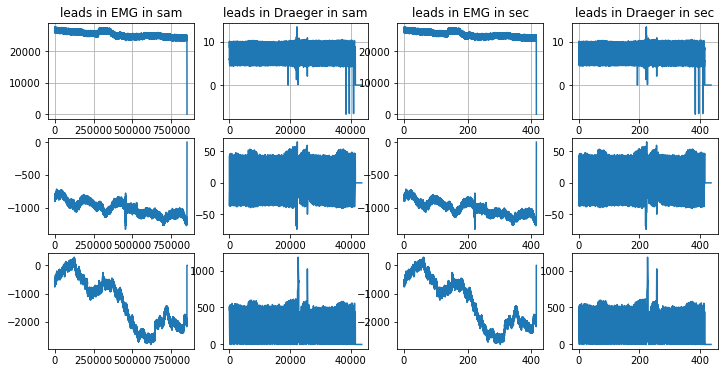

In [20]:
%matplotlib inline
# set up plot, show
x_emg = data_emg_samples
x_draeger = data_draeger_samples

y_emg = [i/emg_sample_rate for i in range(len(data_emg_samples[0]))]
y_draeger = [i/draeger_sample_rate for i in range(len(data_draeger_samples[0]))]

fig, axis = plt.subplots(nrows=3, ncols=4, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(x_emg[0])
axis[0, 0].set(title='leads in EMG in sam')
axis[1, 0].plot(x_emg[1])
axis[2, 0].plot(x_emg[2])

axis[0, 1].set(title='leads in Draeger in sam')
axis[0, 1].grid(True)
axis[0, 1].plot(x_draeger[0])
axis[1, 1].plot(x_draeger[1])
axis[2, 1].plot(x_draeger[2])

axis[0, 2].grid(True)
axis[0, 2].plot(y_emg, x_emg[0])
axis[0, 2].set(title='leads in EMG in sec')
axis[1, 2].plot(y_emg, x_emg[1])
axis[2, 2].plot(y_emg, x_emg[2])

axis[0, 3].set(title='leads in Draeger in sec')
axis[0, 3].grid(True)
axis[0, 3].plot(y_draeger, x_draeger[0])
axis[1, 3].plot(y_draeger, x_draeger[1])
axis[2, 3].plot(y_draeger, x_draeger[2])


In [21]:
# type in start number and press return for it to update
start = input()

In [22]:
# type in end number and press return for it to update
end = input()

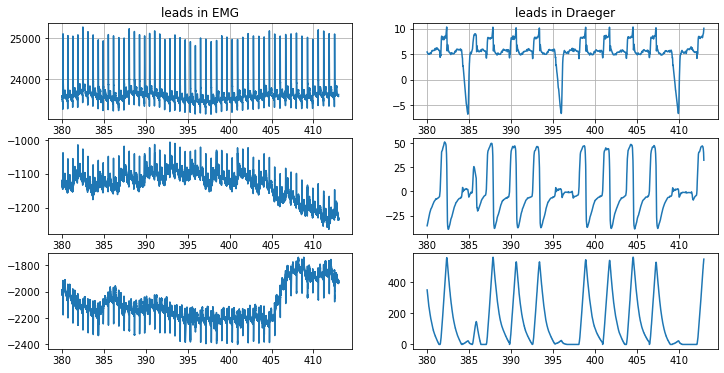

In [23]:
# start_s = float(start)* emg_sample_rate
# end_s = float(end)*emg_sample_rate

if time_view == 'Seconds':
    start_s = int(float(start)* emg_sample_rate)
    end_s = min([int(float(end)*emg_sample_rate), len(data_emg_samples[0])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate)
    end_draeger_s = min([int(float(end)* draeger_sample_rate), len(data_draeger_samples[0])-1])

else:
    start_s = int(float(start))
    end_s = min([int(float(end)), len(data_emg_samples[0])-1])
    start_draeger_s = int(float(start)* draeger_sample_rate/emg_sample_rate)
    end_draeger_s = min([int(float(start)* draeger_sample_rate/emg_sample_rate), len(data_draeger_samples[0])-1])
    y_emg = [range(len(data_emg_samples[0]))]
    y_draeger = [range(len(data_draeger_samples[0]))]

# nox examine at a certain scale- from point a to b as samples
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(12, 6))
axis[0, 0].grid(True)
axis[0, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[0][int(start_s):int(end_s)])
axis[0, 0].set(title='leads in EMG')
axis[1, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[1][int(start_s):int(end_s)])
axis[2, 0].plot(y_emg[int(start_s):int(end_s)], x_emg[2][int(start_s):int(end_s)])
axis[0, 1].set(title='leads in Draeger')
axis[0, 1].grid(True)
axis[0, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[0][int(start_draeger_s):int(end_draeger_s)])
axis[1, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[1][int(start_draeger_s):int(end_draeger_s)])
axis[2, 1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[2][int(start_draeger_s):int(end_draeger_s)])

Happy with your selection? If not redo, then we can see how the filter works on it.

# Apply pre-processing pipeline?

In [24]:
def working_pipeline_pre_gating(our_chosen_samples): 
    # cut_file_data = hf.bad_end_cutter_for_samples(our_chosen_samples, percent_to_cut=3, tolerance_percent=5)
    bd_filtered_file_data = hf.emg_bandpass_butter_sample(our_chosen_samples, 1, 500, 2048, output='sos')
    
        
    return bd_filtered_file_data

In [25]:
# processed_data_emg = working_pipeline_pre_entropy(data_emg_samples)
bd_filtered_file_data = working_pipeline_pre_gating(data_emg_samples)
processed_data_emg = bd_filtered_file_data[1]


In [26]:
RMS_window_ms = 200
RMS_windows_samp = int(RMS_window_ms / 1000 *  emg_sample_rate)

def window_rms(a, window_size):
  a2 = np.power(a,2)
  window = np.ones(window_size)/float(window_size)
  return np.sqrt(np.convolve(a2, window, 'valid'))

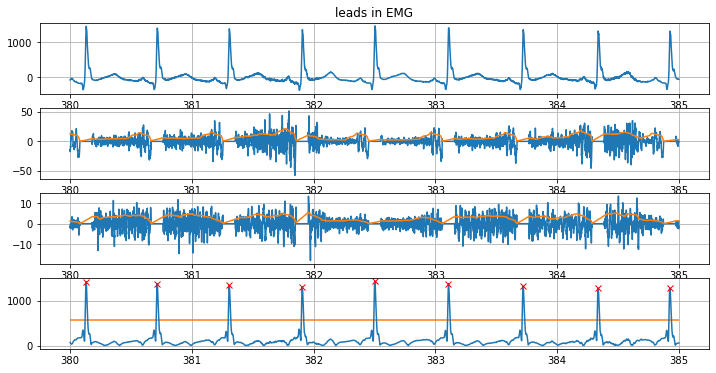

In [27]:
# import copy

plot_window = 5
# Detect ECG peaks
peak_width = 0.001
peak_fraction = 0.40

ecg = bd_filtered_file_data[0]
# ecg_rms = hf.full_rolling_rms(ecg, 10)
ecg_rms = window_rms(ecg, 10)
peak_height = peak_fraction*(max(ecg_rms[int(start_s):int(start_s+plot_window*emg_sample_rate)]) - min(ecg_rms[int(start_s):int(start_s+plot_window*emg_sample_rate)]))

ECG_peaks, properties  = scipy.signal.find_peaks(ecg_rms, height=peak_height, width=peak_width*emg_sample_rate)
# ECG_peaks = ECG_peaks - 10



# Gate ECG and EMG signal
gate_width = 0.1
gate_width_samples = int(gate_width*emg_sample_rate)

ECG_gated = copy.deepcopy(ecg)
ECG_h20 = hf.emg_bandpass_butter_sample(ECG_gated, 20, 500, 2048, output='sos')
# RMS_data_ECG = hf.full_rolling_rms(ECG_gated, RMS_windows_samp) 

ECG_gated = hf.gating(ECG_h20, ECG_peaks, gate_width=gate_width_samples, method='zeros')
ECG_gated_RMS = hf.RMS_gating(ECG_h20, ECG_peaks, gate_width=gate_width_samples, method='interpolate')

emg_gated = copy.deepcopy(processed_data_emg)
emg_h20 = hf.emg_bandpass_butter_sample(emg_gated, 20, 500, 2048, output='sos')
# RMS_data_emg = hf.full_rolling_rms(emg_gated, RMS_windows_samp)

emg_gated = hf.gating(emg_h20, ECG_peaks, gate_width=gate_width_samples, method='zeros')
emg_gated_RMS = hf.RMS_gating(emg_gated, ECG_peaks, gate_width=gate_width_samples, method='interpolate')

# Plot gated signal

fig, axis = plt.subplots(nrows=4, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], bd_filtered_file_data[0, int(start_s):int(start_s+plot_window*2048)])

axis[0].set(title='leads in EMG')
axis[1].grid(True)
axis[1].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ECG_gated[int(start_s):int(start_s+plot_window*2048)])
axis[1].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ECG_gated_RMS[int(start_s):int(start_s+plot_window*2048)])
axis[2].grid(True)
axis[2].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_gated[int(start_s):int(start_s+plot_window*2048)])
axis[2].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], emg_gated_RMS[int(start_s):int(start_s+plot_window*2048)])

axis[3].grid(True)
axis[3].plot(y_emg[int(start_s):int(start_s+plot_window*2048)], ecg_rms[int(start_s):int(start_s+plot_window*2048)])
axis[3].hlines(y=peak_height, xmin=y_emg[int(start_s)], xmax=y_emg[int(start_s+plot_window*2048)], color = "C1")
for idx in range(len(ECG_peaks)):
    if (ECG_peaks[idx] > int(start_s)) & (ECG_peaks[idx] < int(start_s+plot_window*2048)):
        axis[3].plot(y_emg[ECG_peaks[idx]], ecg_rms[ECG_peaks[idx]],'rx')


# Calculate RMS

In [1]:
RMS_data_emg = window_rms(emg_gated, RMS_windows_samp)

gate_samples = list()
for i in range(len(ECG_peaks)):
    # pre_ave_EMG = np.mean(RMS_data_emg[int(ECG_peaks[i]-gate_width_samples/2)-RMS_windows_samp:int(ECG_peaks[i]-gate_width_samples/2)])
    # post_ave_EMG = np.mean(RMS_data_emg[int(ECG_peaks[i]+gate_width_samples/2):int(ECG_peaks[i]+gate_width_samples/2)+RMS_windows_samp])
    if int(ECG_peaks[i]+gate_width_samples/2+1) < RMS_data_emg.shape[0]:
        pre_ave_EMG = RMS_data_emg[int(ECG_peaks[i]-gate_width_samples/2-1)]
        post_ave_EMG = RMS_data_emg[int(ECG_peaks[i]+gate_width_samples/2+1)]
        for k in range(int(ECG_peaks[i]-gate_width_samples/2),int(ECG_peaks[i]+gate_width_samples/2)):
            gate_samples.append(k)
            f = (k - ECG_peaks[i] + gate_width_samples/2)/gate_width_samples
            RMS_data_emg[k] = (1 - f) * pre_ave_EMG + f * post_ave_EMG


fig, axis = plt.subplots(nrows=3, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot(y_emg[int(start_s):int(end_s)], processed_data_emg[int(start_s):int(end_s)])
axis[0].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg[int(start_s):int(end_s)])
# axis[0].plot(RMS_data_emg[int(start_s):int(end_s)])
axis[0].set(title='leads in EMG')
axis[0].set_ylabel('sEMGdi (uV)')

# axis[1].set(title='leads in Draeger')
axis[1].grid(True)
axis[1].plot(y_draeger[int(start_draeger_s):int(end_draeger_s)], x_draeger[0][int(start_draeger_s):int(end_draeger_s)])
axis[1].set_ylabel('P_vent (cmH2O)')
axis[2].plot(y_emg[int(start_s):int(end_s)], RMS_data_emg[int(start_s):int(end_s)])
axis[2].set_xlabel('t (s)')
axis[2].set_ylabel('RMS{sEMGdi} (uV)')


NameError: name 'window_rms' is not defined

Determine PEEP level

In [ ]:
x = x_draeger[2][:int(start_draeger_s)]
V_ee_PKS, _ = scipy.signal.find_peaks(-x)

PEEP_set = np.floor(np.median(x_draeger[0, V_ee_PKS]))


PEEP_set

In [ ]:
baseline_W = 5 * emg_sample_rate # window length

# rolling_base_line = np.percentile(strided_app(RMS_data_emg[int(start_s):int(end_s)], W,1), 33, axis=-1)
rolling_base_line = np.zeros((len(RMS_data_emg[int(start_s):int(end_s)]),))
for idx in range(int(end_s)-int(start_s)):
    rolling_base_line[idx] =  np.percentile(RMS_data_emg[max([int(start_s), int(start_s)+idx-int(baseline_W/2)]):min([int(end_s), int(start_s)+idx+int(baseline_W/2)])], 33)


Get PTPocc

In [ ]:
Pocc_prominence_factor = 0.7

treshold = 0
width = int(0.2 * draeger_sample_rate)
prominence = Pocc_prominence_factor *np.abs( PEEP_set - min(x_draeger[0]))
height = -(PEEP_set - Pocc_prominence_factor *np.abs( PEEP_set - min(x_draeger[0])))
distance = int(0.5 * draeger_sample_rate)

x = x_draeger[0][int(start_draeger_s):int(end_draeger_s)]
P_occ_peaks, properties  = scipy.signal.find_peaks(-x, height=height, prominence=prominence, width=width, distance=distance)
x = x_draeger[0][int(start_draeger_s):int(end_draeger_s)]

PEEP_crossings_idx = np.argwhere(np.diff(np.sign(x - PEEP_set)) != 0)

P_occ_starts = np.zeros((len(P_occ_peaks),), dtype=int)
P_occ_ends = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    a = np.argmin(P_occ_peaks[idx] - np.argwhere(np.diff(np.sign(x[:P_occ_peaks[idx]] - PEEP_set)) != 0))
    P_occ_starts[idx] = int(PEEP_crossings_idx[a])
    P_occ_ends[idx] = int(PEEP_crossings_idx[a+1])

P_occ_starts,P_occ_peaks,  P_occ_ends, prominence, height

In [ ]:
EMG_prominence_factor = 0.02

y = RMS_data_emg[int(start_s):int(end_s)]
treshold = 0
width = int(0.1 * emg_sample_rate)
prominence = EMG_prominence_factor*(max(y)-np.percentile(y[:-emg_sample_rate], 5))
EMG_peaks, properties  = scipy.signal.find_peaks(y, height=treshold, prominence=prominence, width=width)

draeger_delay = 0.03

EMG_occ_peaks = np.zeros((len(P_occ_peaks),), dtype=int)
PKS_idx = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    PKS_idx[idx] = np.argmin(np.abs(EMG_peaks + draeger_delay * emg_sample_rate - P_occ_peaks[idx]/draeger_sample_rate*emg_sample_rate))

    EMG_occ_peaks[idx] = EMG_peaks[PKS_idx[idx]]

EMG_properties=dict()
EMG_properties["width_heights"] = properties["width_heights"][PKS_idx]
EMG_properties["left_ips"] = properties["left_ips"][PKS_idx]
EMG_properties["right_ips"] = properties["right_ips"][PKS_idx]

# ------------------------------------------------
base_frac = 1
base_line = base_frac * np.percentile(y[:-emg_sample_rate], 15)
baseline_crossings_idx = np.argwhere(np.diff(np.sign(y - base_line)) != 0)

# def strided_app(a, L, S ):  # Window len = L, Stride len/stepsize = S
#     nrows = ((a.size-L)//S)+1
#     n = a.strides[0]
#     return np.lib.stride_tricks.as_strided(a, shape=(nrows,L), strides=(S*n,n))

baseline_crossings_idx = np.argwhere(np.diff(np.sign(y - rolling_base_line)) != 0)
# -------------------------------------------------

# EMG_occ_peaks[0] - np.argwhere(np.diff(np.sign(y[:EMG_occ_peaks[0]] - base_line)) != 0)

EMG_occ_starts = np.zeros((len(P_occ_peaks),), dtype=int)
EMG_occ_ends = np.zeros((len(P_occ_peaks),), dtype=int)
for idx in range(len(P_occ_peaks)):
    a = np.argmin(EMG_occ_peaks[idx] - np.argwhere(np.diff(np.sign(y[:EMG_occ_peaks[idx]] - rolling_base_line[:EMG_occ_peaks[idx]])) != 0))
    EMG_occ_starts[idx] = int(baseline_crossings_idx[a])
    EMG_occ_ends[idx] = int(baseline_crossings_idx[a+1])

EMG_occ_starts, EMG_occ_peaks, EMG_occ_ends



In [ ]:
fig_1, axis = plt.subplots(nrows=2, ncols=1, figsize=(12, 6))
axis[0].grid(True)
axis[0].plot([y / draeger_sample_rate for y in range(len(x))], x)
axis[0].plot(P_occ_peaks/draeger_sample_rate, x[P_occ_peaks], "x")
axis[0].vlines(x=P_occ_peaks/draeger_sample_rate, ymin=x[P_occ_peaks], ymax = x[P_occ_peaks]-x[P_occ_peaks]+PEEP_set , color = "C1")
axis[0].hlines(y=np.tile(PEEP_set,(len(P_occ_peaks),1)), xmin=P_occ_starts/draeger_sample_rate, xmax=P_occ_ends/draeger_sample_rate, color = "C1")
# axis[0].set(title='leads in Draeger')
axis[0].set_ylabel('P_vent (cmH2O)')

axis[1].grid(True)
# axis[1].plot(processed_data_emg[int(start_s):int(end_s)])
axis[1].plot([y / emg_sample_rate for y in range(len(RMS_data_emg[int(start_s):int(end_s)]))], RMS_data_emg[int(start_s):int(end_s)])

axis[1].plot(EMG_occ_peaks/emg_sample_rate, y[EMG_occ_peaks], "x", color = "r")

# Rolling baseline:
axis[1].plot([y / emg_sample_rate for y in range(len(rolling_base_line))], rolling_base_line[:int(end_s)-int(start_s)])
axis[1].plot(EMG_occ_starts / emg_sample_rate, rolling_base_line[EMG_occ_starts],'*r')
axis[1].plot(EMG_occ_ends / emg_sample_rate, rolling_base_line[EMG_occ_ends],'*r')
# axis[1].vlines(x=peaks, ymin=x[peaks], ymax = x[peaks]+ properties["prominences"], color = "C1")
# axis[1].hlines(y=EMG_properties["width_heights"], xmin=EMG_properties["left_ips"], xmax=EMG_properties["right_ips"], color = "C1")

# axis[1].vlines(x=EMG_occ_peaks/emg_sample_rate, ymin=y[EMG_occ_peaks], ymax = y[EMG_occ_peaks]-y[EMG_occ_peaks]+base_line , color = "C1")
# axis[1].hlines(y=np.tile(base_line,(len(EMG_occ_peaks),1)), xmin=EMG_occ_starts/emg_sample_rate, xmax=EMG_occ_ends/emg_sample_rate, color = "C1")

# axis[1].set(title='leads in EMG')
axis[1].set_ylabel('RMS{sEMGdi} (uV)')
axis[1].set_xlabel('t (s)')
# axis[1].set_ylim([0,10])




In [ ]:
fig_2, axis = plt.subplots(nrows=2, ncols=len(P_occ_peaks), figsize=(12, 6), sharex='col', sharey='row')


PTP_occs = np.zeros((len(P_occ_peaks),))
for idx in range(len(P_occ_peaks)):
    axis[0, idx].grid(True)
    axis[0, idx].plot(y_draeger[P_occ_starts[idx]:P_occ_ends[idx]+1], x[P_occ_starts[idx]:P_occ_ends[idx]+1]-PEEP_set)
    PTP_occs[idx] = np.trapz(x[P_occ_starts[idx]:P_occ_ends[idx]+1]-PEEP_set, dx=1/draeger_sample_rate)

axis[0, 0].set_ylabel('Pocc (cmH2O)')

ETP_occs = np.zeros((len(EMG_occ_peaks),))
for idx in range(len(EMG_occ_peaks)):
    axis[1, idx].grid(True)
    # axis[1, idx].plot(y_emg[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], y[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1]- base_frac*min(y))
    axis[1, idx].plot(y_emg[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], y[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1])
    
    axis[1, idx].plot(y_emg[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], rolling_base_line[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1])

    axis[1, idx].plot(y_emg[EMG_occ_peaks[idx]], y[EMG_occ_peaks[idx]],'*r')
    axis[1, idx].plot(y_emg[EMG_occ_starts[idx]], y[EMG_occ_starts[idx]],'*r')
    axis[1, idx].plot(y_emg[EMG_occ_ends[idx]], y[EMG_occ_ends[idx]],'*r')
    ETP_occs[idx] = np.trapz(y[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1] - rolling_base_line[EMG_occ_starts[idx]:EMG_occ_ends[idx]+1], dx=1/emg_sample_rate)

    axis[1, idx].set_xlabel('t (s)')

axis[1, 0].set_ylabel('sEMGdi (uV)')



NME = np.abs(PTP_occs)/ETP_occs

PTP_occs, ETP_occs, NME

Store values for later analysis

In [ ]:
patient = emg_files[number_chosen].split('\\')[-3].split('/')[-2]
measurement = emg_files[number_chosen].split('\\')[-2]

fig_1.savefig('../not_pushed/Output_data/' + patient + '_'+ measurement + '_timeplots_'+str(int(gate_width*1000))+'.png', dpi=300)
fig_2.savefig('../not_pushed/Output_data/' + patient + '_'+ measurement + '_snapshots_'+str(int(gate_width*1000))+'.png', dpi=300)

for idx in range(len(PTP_occs)):
    data_now = [patient, measurement, PEEP_set, PTP_occs[idx], ETP_occs[idx], NME[idx]]
    big_data_list.append(data_now)
    

patient, measurement

In [ ]:
big_data_list

In [ ]:
columns_now = ['patient', 'measurement', 'PEEP_set', 'PTP_occs', 'ETP_occs', 'NME'
              ]
df = pd.DataFrame(big_data_list, columns= columns_now)
df

In [ ]:
bp = df.boxplot(column='NME', by='PEEP_set')
bp.set_ylabel('NME (cmH2O/uV)')
bp.set_xlabel('PEEP (cmH2O)')
bp.set_title('')

In [ ]:
df.to_csv('../not_pushed/Output_data/' + patient + '_my_saved_NME_experiments_gate_'+str(int(gate_width*1000))+'.csv')
bp.figure.savefig('../not_pushed/Output_data/' + patient + '_'+str(int(gate_width*1000))+'_boxplot.png', dpi=300)